In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Hitters.csv')
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


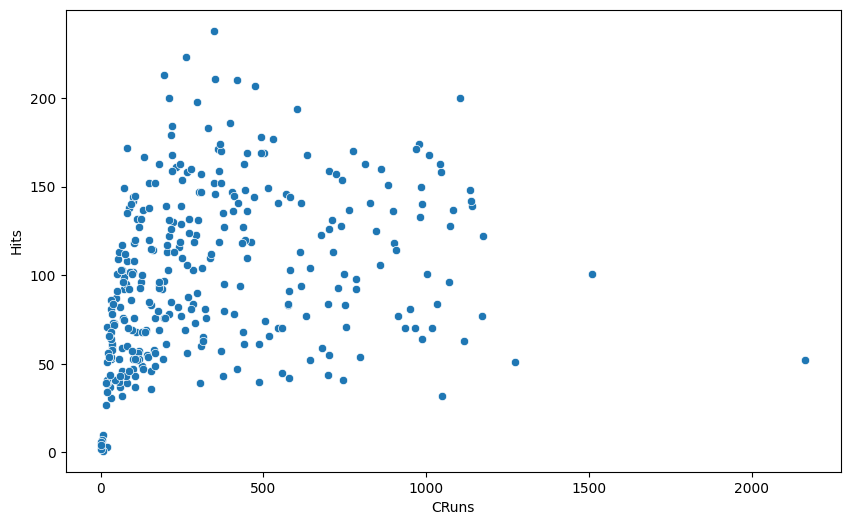

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['CRuns'],y=df['Hits'])
plt.show()

In [10]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [12]:
x=df[['CRuns','Hits']]

In [13]:
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [15]:
sse=[]
for i in range(1,16):
    km=KMeans(n_clusters=i,n_init=100)
    km.fit_predict(x)
    sse.append(km.inertia_)
sse

[36524916.27329192,
 10612574.042518314,
 5934924.0018878635,
 3890501.918312154,
 2626091.299915617,
 1922178.9951395844,
 1592769.368819958,
 1334031.5914932494,
 1113408.7556747757,
 978366.9828149802,
 865946.533105034,
 787079.2811553774,
 702310.1846013637,
 636363.5831349206,
 585589.23664361]

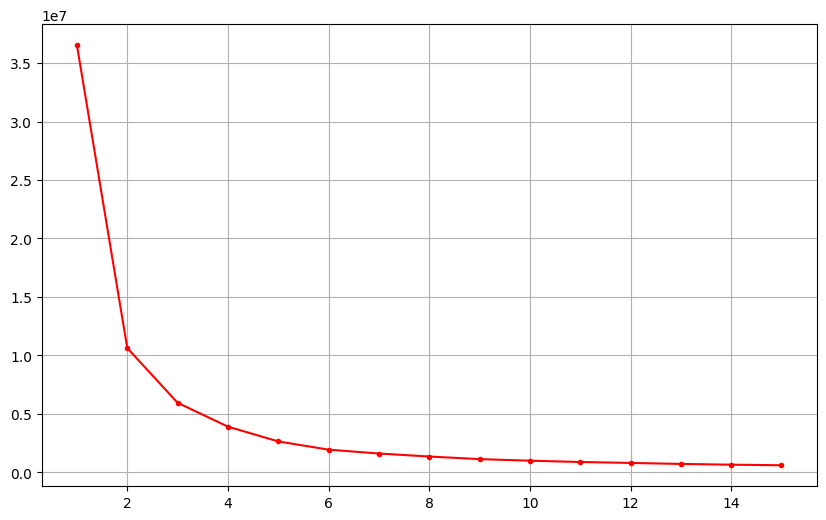

In [16]:
plt.figure(figsize=(10,6))
plt.plot(range(1,16),sse,marker='.',color='r')
plt.grid()
plt.show()

In [17]:
silh=[]
for i in range(2,16):
    km=KMeans(n_clusters=i,n_init=100)
    labels=km.fit_predict(x)
    silh.append(silhouette_score(x,labels))
silh

[0.6645851751637752,
 0.5801603891535735,
 0.537854896669065,
 0.5389536948868217,
 0.4982579053012645,
 0.4793375999115561,
 0.4573086065238109,
 0.4071119661856172,
 0.40271238382522356,
 0.3819341977474086,
 0.39582862472080166,
 0.4061697747736133,
 0.39764085512969205,
 0.39373928679989734]

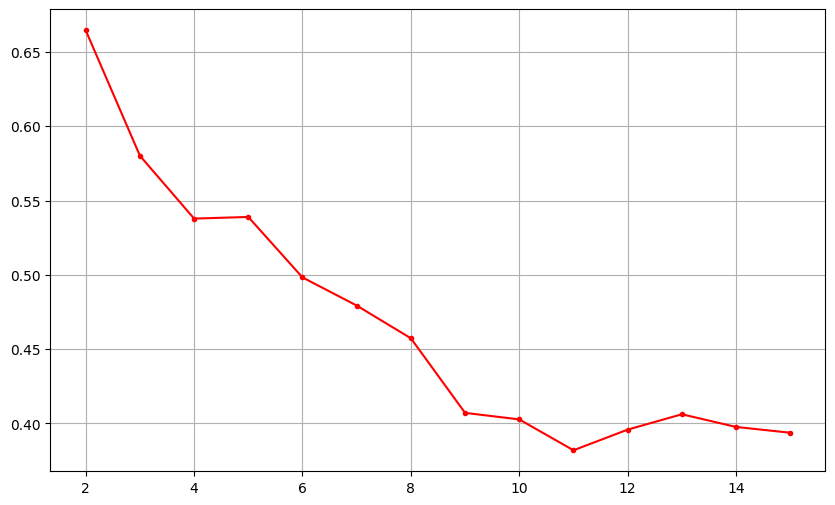

In [18]:
plt.figure(figsize=(10,6))
plt.plot(range(2,16),silh,marker='.',color='r')
plt.grid()
plt.show()

In [20]:
km=KMeans(n_clusters=4,n_init=100)
labels=km.fit_predict(x)
labels

array([2, 0, 0, 3, 2, 0, 2, 2, 2, 3, 3, 2, 2, 0, 0, 2, 1, 2, 3, 2, 2, 2,
       2, 0, 1, 0, 0, 0, 0, 3, 1, 2, 3, 0, 2, 3, 2, 2, 3, 2, 2, 3, 0, 2,
       0, 2, 2, 2, 1, 0, 1, 2, 2, 3, 3, 2, 2, 0, 0, 3, 2, 3, 2, 2, 2, 1,
       2, 2, 2, 3, 1, 2, 3, 1, 1, 0, 2, 2, 0, 2, 1, 1, 0, 2, 3, 3, 1, 2,
       3, 2, 2, 0, 2, 2, 0, 0, 1, 3, 2, 0, 1, 2, 2, 0, 1, 2, 2, 3, 0, 2,
       1, 2, 3, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 0, 3, 3, 2, 0, 0, 0, 0, 2,
       1, 2, 2, 2, 0, 3, 2, 2, 2, 0, 3, 1, 3, 0, 0, 0, 0, 3, 2, 2, 2, 0,
       0, 2, 3, 2, 3, 2, 2, 0, 2, 1, 3, 2, 0, 2, 2, 2, 3, 2, 2, 2, 0, 0,
       2, 0, 1, 1, 0, 3, 0, 2, 0, 0, 2, 0, 2, 0, 2, 3, 3, 2, 3, 3, 3, 2,
       2, 3, 3, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 3, 3, 2, 0, 3, 2, 3, 0, 1, 2, 0, 2, 3, 2,
       0, 1, 2, 0, 0, 0, 3, 1, 2, 0, 0, 2, 0, 2, 3, 0, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 3, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 0, 0,
       0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 0, 0,

In [22]:
cen=km.cluster_centers_

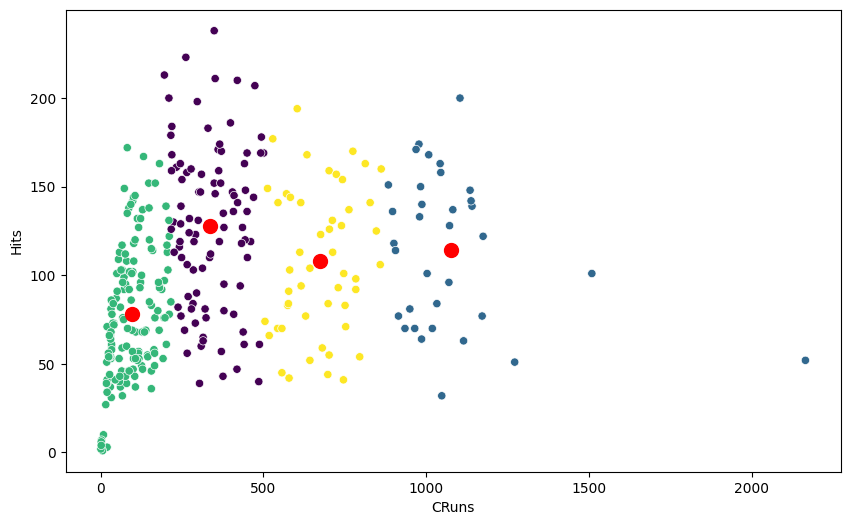

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['CRuns'],y=df['Hits'],c=labels)
plt.scatter(cen[:,0],cen[:,1],c='r',s=100)
plt.show()

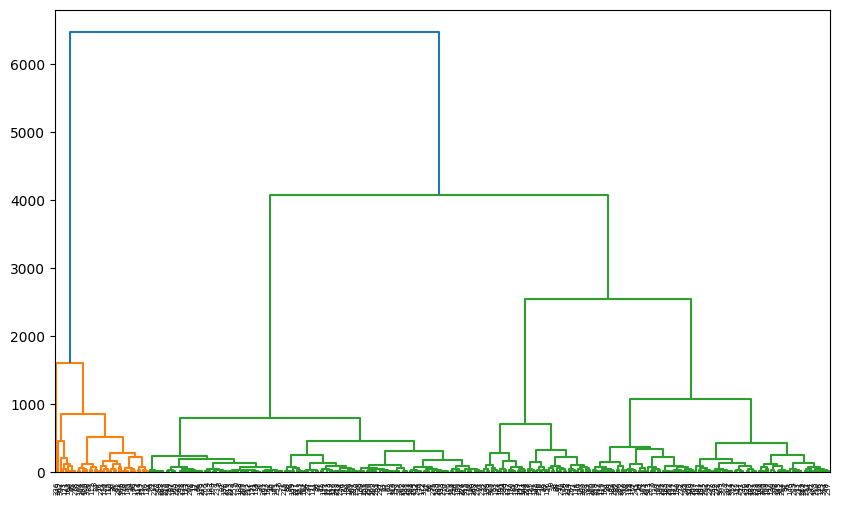

In [25]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,6))
sch.dendrogram(sch.linkage(x,method='ward'))
plt.show()

In [27]:
ag=AgglomerativeClustering(n_clusters=4)
labels1=ag.fit_predict(x)
labels1

array([2, 1, 1, 0, 2, 1, 2, 2, 2, 3, 3, 2, 1, 1, 1, 2, 0, 2, 3, 2, 2, 2,
       2, 1, 0, 1, 1, 1, 1, 3, 0, 2, 3, 1, 2, 0, 2, 2, 3, 2, 2, 3, 1, 2,
       3, 2, 2, 2, 0, 1, 0, 2, 2, 3, 3, 2, 2, 1, 1, 1, 2, 3, 2, 2, 2, 0,
       2, 2, 2, 3, 0, 2, 3, 0, 0, 1, 2, 2, 1, 2, 0, 0, 1, 2, 0, 3, 0, 2,
       3, 2, 2, 1, 2, 2, 1, 1, 0, 3, 2, 1, 0, 2, 2, 1, 0, 2, 2, 3, 1, 2,
       0, 2, 0, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 3, 3, 2, 1, 1, 1, 1, 2,
       0, 2, 2, 2, 1, 3, 2, 2, 2, 1, 3, 0, 3, 1, 1, 1, 1, 3, 2, 2, 2, 1,
       1, 2, 3, 2, 3, 2, 2, 1, 2, 0, 3, 2, 1, 2, 2, 2, 3, 2, 2, 2, 1, 1,
       2, 1, 0, 0, 1, 3, 1, 2, 1, 1, 2, 1, 2, 1, 2, 3, 3, 2, 1, 3, 3, 2,
       2, 3, 3, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 3, 3, 2, 1, 3, 2, 3, 1, 0, 2, 1, 2, 3, 2,
       1, 0, 2, 1, 1, 1, 0, 0, 2, 1, 1, 2, 1, 2, 3, 1, 1, 2, 1, 2, 2, 1,
       2, 2, 2, 3, 2, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 2, 0, 1, 2, 2, 2, 2, 2, 3, 1,

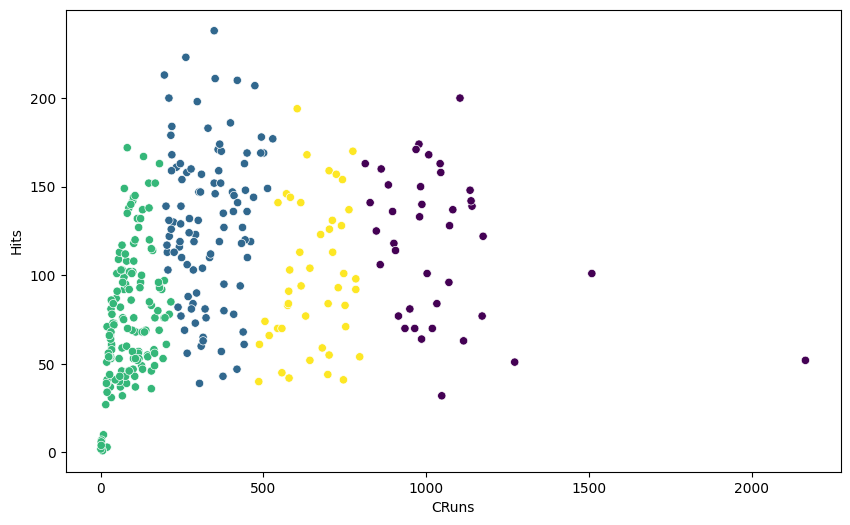

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['CRuns'],y=df['Hits'],c=labels1)
#plt.scatter(cen[:,0],cen[:,1],c='r',s=100)
plt.show()